In [1]:
!pip install pandas matplotlib seaborn scikit-learn prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 3.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.3 MB 5.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 6.0 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/13.3 MB 6.0 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.3 MB 4.5 MB/s eta 0:00:02
   ---------------- ----------------------- 5.5/13.3 MB 5.1 MB/s eta 0:00:02
   ---------------- ----------------------- 5.5/13.3 MB 5.1 MB/s eta 0:00:02
   ---------------- ----------------------- 5.5/13.3 MB 5.1 MB/s eta 0:00:02
   ---------------- ----------------------- 5.5/13.3 MB 5.1 MB/s eta 0:00:02
   ---------------- ----------------------- 5.5/13.3 MB 5.1 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.3 MB 2.7 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/13.3 MB 2.5 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd


In [5]:
df = pd.read_csv(r"C:\Users\arbi\Desktop\projet4\retail_store_inventory.csv")
df.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [7]:
df.columns


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df_sample = df[(df['Product ID'] == 'P0001') & (df['Store ID'] == 'S001')]


In [10]:
sales_by_date = df_sample.groupby('Date')['Units Sold'].sum().reset_index()


In [11]:
print(sales_by_date.head())


        Date  Units Sold
0 2022-01-01         127
1 2022-01-02          81
2 2022-01-03           5
3 2022-01-04          58
4 2022-01-05         147


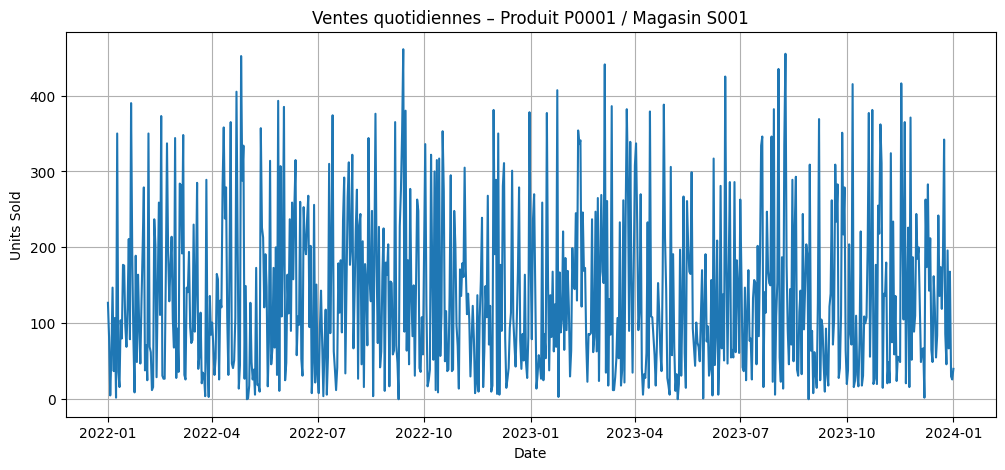

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(sales_by_date['Date'], sales_by_date['Units Sold'])
plt.title("Ventes quotidiennes – Produit P0001 / Magasin S001")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


In [13]:
!pip install prophet



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from prophet import Prophet

# Préparer les données
df_prophet = sales_by_date.rename(columns={'Date': 'ds', 'Units Sold': 'y'})


Importing plotly failed. Interactive plots will not work.


In [15]:
!pip install plotly


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 3.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 5.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 5.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 5.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 4.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 2.3 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from prophet import Prophet

# Préparer les données
df_prophet = sales_by_date.rename(columns={'Date': 'ds', 'Units Sold': 'y'})

In [17]:
model = Prophet()
model.fit(df_prophet)


06:43:09 - cmdstanpy - INFO - Chain [1] start processing
06:43:10 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


C:\Users\arbi\AppData\Local\Temp\ipykernel_15276\138756007.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\arbi\AppData\Local\Temp\ipykernel_15276\138756007.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


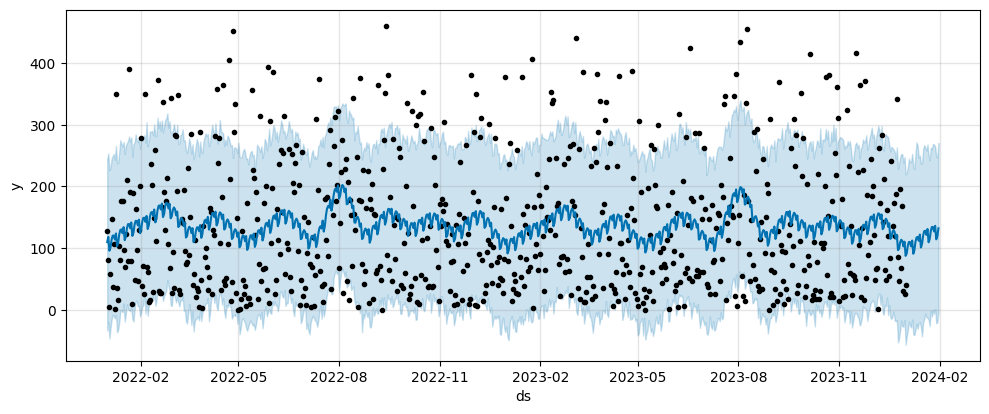

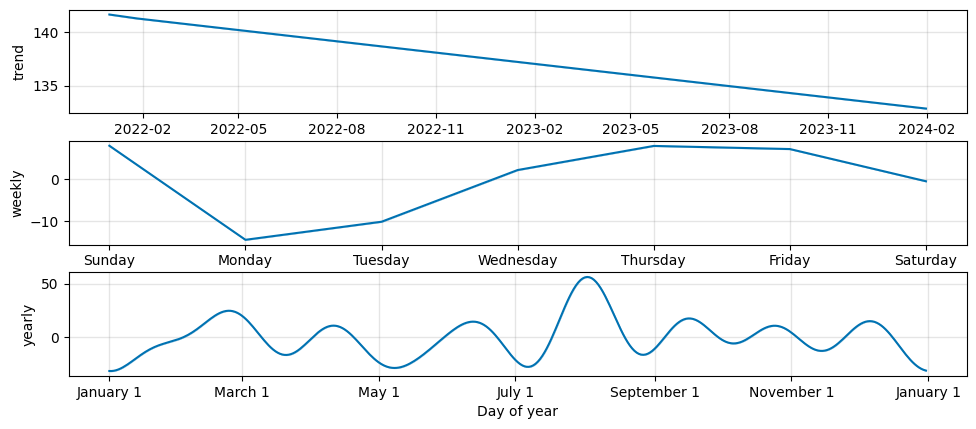

In [21]:
fig1 = model.plot(forecast)
fig1.set_size_inches(10, 4)  # largeur=10, hauteur=4 (plus compact)
fig1.show()

fig2 = model.plot_components(forecast)
fig2.set_size_inches(10, 4)
fig2.show()
